# 딥러닝
1. forward propagation
2. backward propagation
3. loss function
4. optimizer
5. activation function

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [48]:
# Load the dataset
file_path = 'D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week5/dataFrame/heart.csv'

In [49]:
df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
# Check the data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [52]:
# Check the shape of the dataset
df.shape

(303, 14)

In [53]:
# Check the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
# Check the distribution of the target variable
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [55]:
# Check the correlation matrix
correlation_matrix = df.corr()

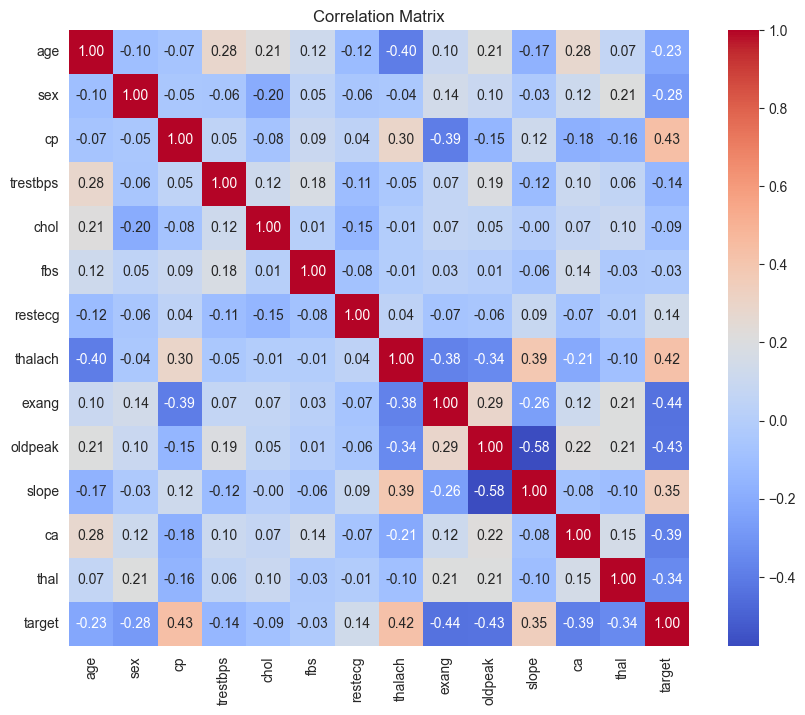

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
df.duplicated().sum()

np.int64(1)

In [58]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [59]:
# Check the distribution of the target variable again
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [60]:
# Split the dataset into features and target variable
X = df.drop(columns=['target'])
y = df['target']

In [61]:
# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
    


In [62]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

In [66]:

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
confusion_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Confusion Matrix:')
print(confusion_log_reg)

Logistic Regression Accuracy: 0.819672131147541
Confusion Matrix:
[[24  5]
 [ 6 26]]


In [67]:
# Train a Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [68]:

# Make predictions
y_pred_svm = svm_model.predict(X_test)

In [69]:

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm}')
print('Confusion Matrix:')
print(confusion_svm)

Support Vector Machine Accuracy: 0.8688524590163934
Confusion Matrix:
[[27  2]
 [ 6 26]]


In [70]:
# Train a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# Make predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [72]:
# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print(f'Decision Tree Accuracy: {accuracy_decision_tree}')
print('Confusion Matrix:')
print(confusion_decision_tree)

Decision Tree Accuracy: 0.7868852459016393
Confusion Matrix:
[[25  4]
 [ 9 23]]


In [73]:
# Train a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
# Make predictions      
y_pred_random_forest = random_forest_model.predict(X_test)

In [75]:
# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print(f'Random Forest Accuracy: {accuracy_random_forest}')
print('Confusion Matrix:')
print(confusion_random_forest)

Random Forest Accuracy: 0.8852459016393442
Confusion Matrix:
[[26  3]
 [ 4 28]]


In [76]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
# Make predictions
y_pred_knn = knn_model.predict(X_test)

In [78]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn}')
print('Confusion Matrix:')
print(confusion_knn)

K-Nearest Neighbors Accuracy: 0.9180327868852459
Confusion Matrix:
[[28  1]
 [ 4 28]]


In [79]:
# Compare the accuracies of all models
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'Support Vector Machine': accuracy_svm,
    'Decision Tree': accuracy_decision_tree,
    'Random Forest': accuracy_random_forest,
    'K-Nearest Neighbors': accuracy_knn
}

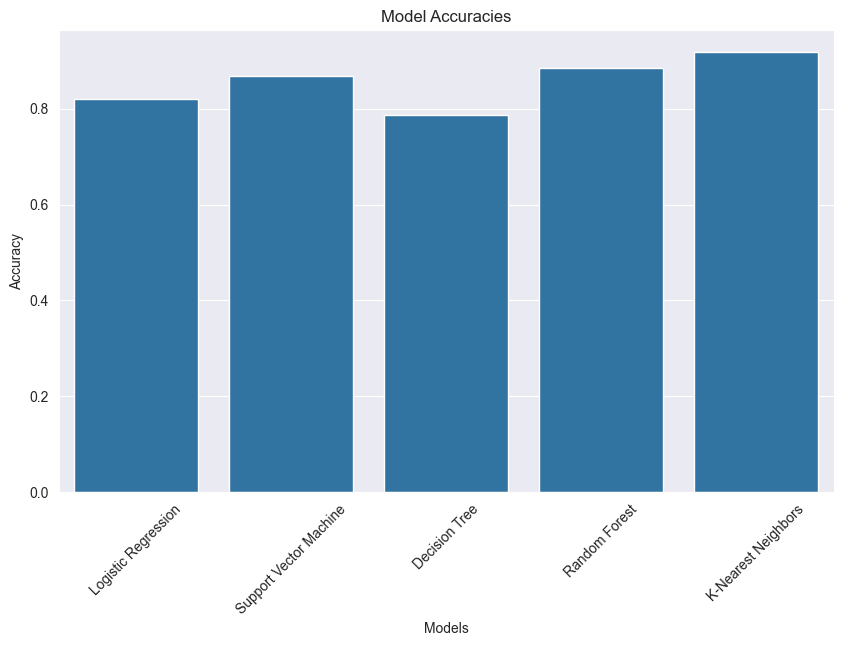

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

# 딥러닝 모델

In [81]:
import tensorflow as tf

In [82]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [83]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [84]:
y.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [85]:
y = pd.get_dummies(y).values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241, 2), (61, 2))

In [88]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Vì là bài toán phân loại nhị phân
])

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [90]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.4623 - mse: 0.4623 - val_loss: 0.4588 - val_mse: 0.4588
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4581 - mse: 0.4581 - val_loss: 0.4556 - val_mse: 0.4556
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4562 - val_mse: 0.4562
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4502 - mse: 0.4502 - val_loss: 0.4526 - val_mse: 0.4526
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4499 - mse: 0.4499 - val_loss: 0.4549 - val_mse: 0.4549
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.4527 - val_mse: 0.4527
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4539 - val_mse: 0.4539
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.4469 - val_mse: 0.4469
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4469 - mse:

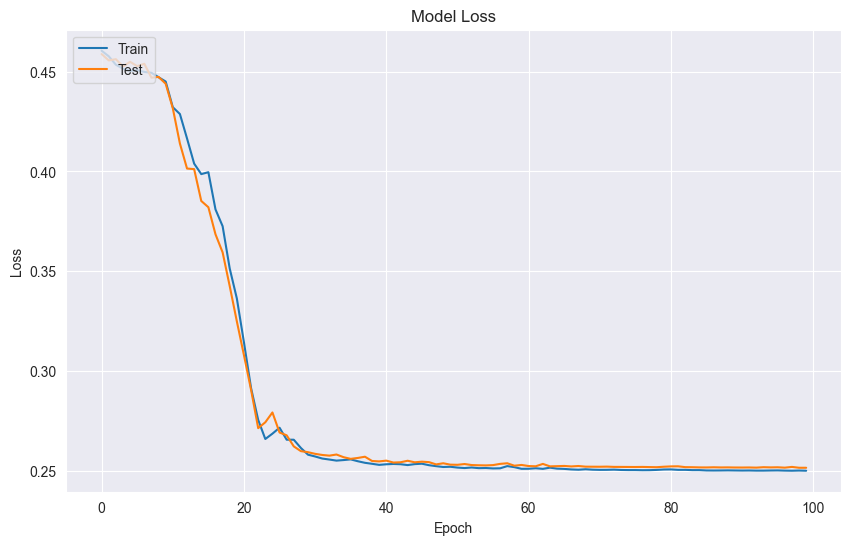

In [91]:
# loss check
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

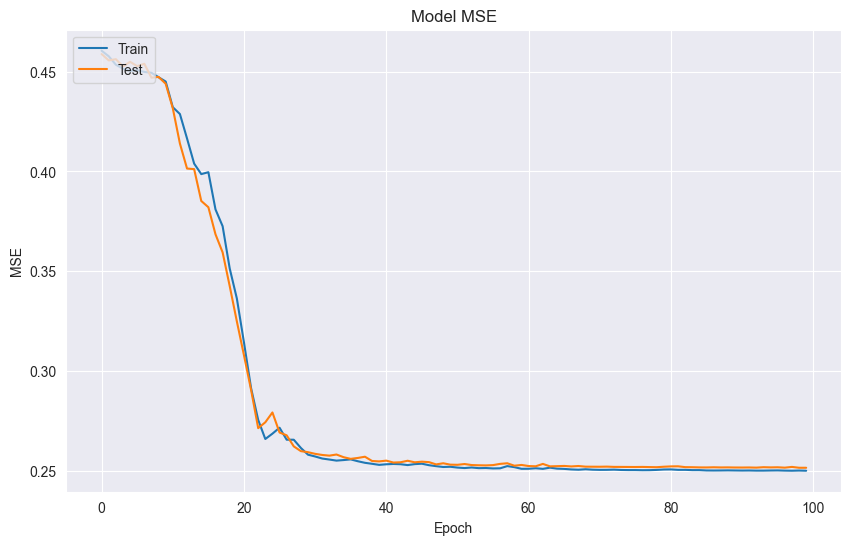

In [92]:
# mse check
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()